In [2]:
import pickle

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# sns.set_palette(sns.color_palette("Set2"))
# plt.rcParams["font.family"] = ["Roboto"]
plt.rcParams["font.family"] = ["Open Sans"]

In [2]:
with open("rep_ctrl_num_sim_results.pkl", "rb") as f:
    results = pd.DataFrame(pickle.load(f))

results.rename(columns={"n_plates": "n_replicates"}, inplace=True)
results["n_controls"] = results["n_controls"] * 2
results

,replicate_reproducibility,mp_value,mean_ap,mean_ap_p_value,n_replicates,n_controls,features_differ,differ_params
0,0.010000,0.04,0.19,0.00,2,8,2,1
1,0.020000,0.05,0.16,0.00,2,8,4,1
2,0.010000,0.01,0.17,0.00,2,8,8,1
3,0.000000,0.13,0.34,0.00,2,8,16,1
4,0.000000,0.06,0.70,0.00,2,8,32,1
...,...,...,...,...,...,...,...,...
67,0.035000,0.09,0.00,0.04,4,48,4,1
68,0.011667,0.29,0.00,0.05,4,48,8,1
69,0.000000,0.82,0.00,0.47,4,48,16,1
70,0.000000,1.00,0.02,0.99,4,48,32,1


In [3]:
df = results[["mp_value", "mean_ap", "mean_ap_p_value", "n_replicates", "n_controls", "features_differ"]]
df['features_differ'] = df['features_differ'] / 100
df['features_differ'] = df['features_differ'].astype(str)
df

/tmp/ipykernel_10092/3587429785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['features_differ'] = df['features_differ'] / 100
/tmp/ipykernel_10092/3587429785.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['features_differ'] = df['features_differ'].astype(str)


,mp_value,mean_ap,mean_ap_p_value,n_replicates,n_controls,features_differ
0,0.04,0.19,0.00,2,8,0.02
1,0.05,0.16,0.00,2,8,0.04
2,0.01,0.17,0.00,2,8,0.08
3,0.13,0.34,0.00,2,8,0.16
4,0.06,0.70,0.00,2,8,0.32
...,...,...,...,...,...,...
67,0.09,0.00,0.04,4,48,0.04
68,0.29,0.00,0.05,4,48,0.08
69,0.82,0.00,0.47,4,48,0.16
70,1.00,0.02,0.99,4,48,0.32


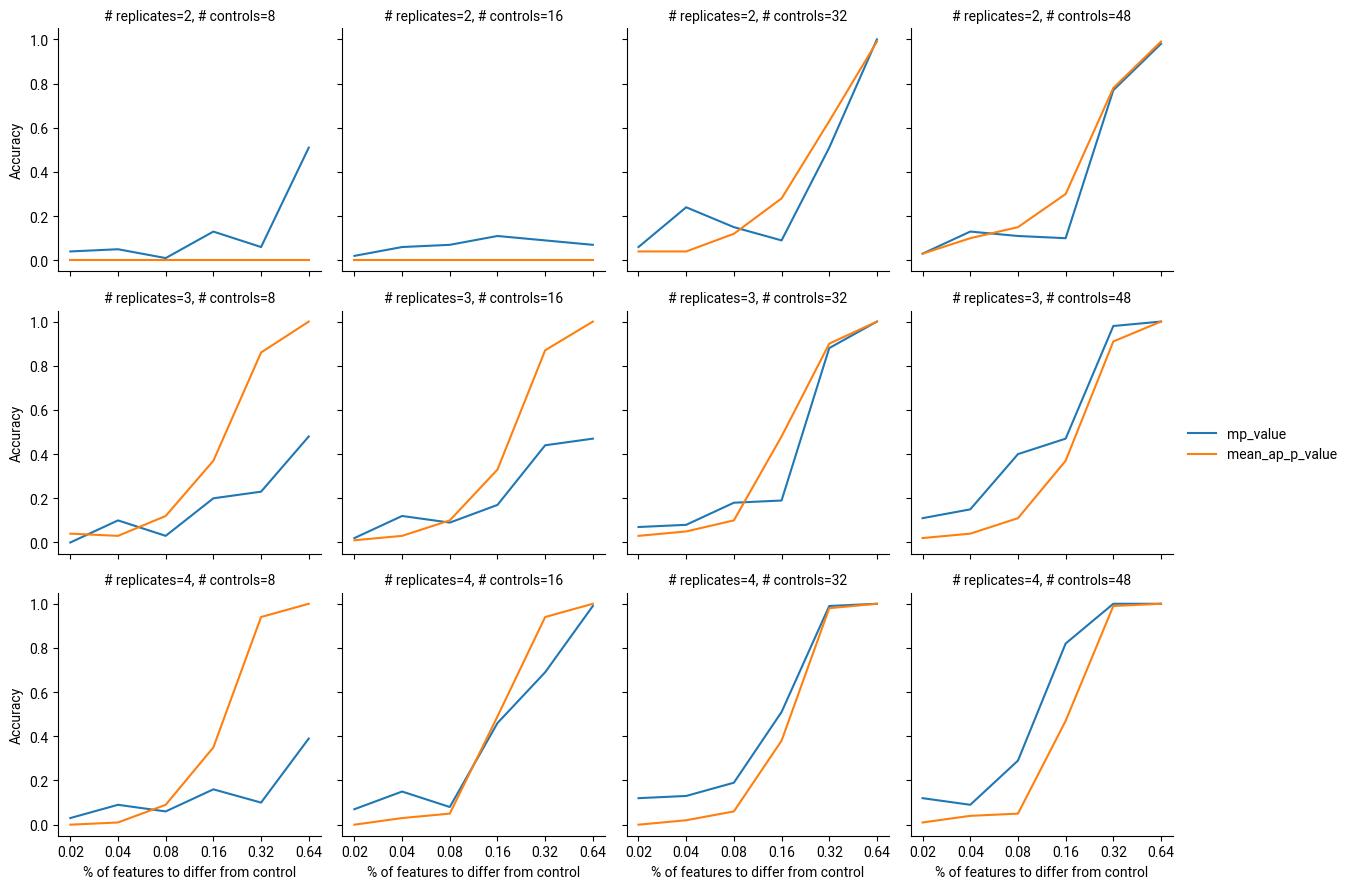

In [4]:
df_melted = df.melt(id_vars=['features_differ', 'n_replicates', 'n_controls'], 
                    # value_vars=['mp_value', 'mean_ap', 'mean_ap_p_value'], 
                    value_vars=['mp_value', 'mean_ap_p_value'], 
                    var_name='metric', value_name='value')


# Setting up the FacetGrid
g = sns.FacetGrid(df_melted, row='n_replicates', col='n_controls', height=3, aspect=1.0)

# Mapping the lineplot to each subset of the data
g.map_dataframe(sns.lineplot, x='features_differ', y='value', 
                hue='metric', markers=True, 
                dashes=False, markersize=10)

# Adding additional plot details
g.add_legend()
g.set_titles("# replicates={row_name}, # controls={col_name}")
g.set_axis_labels("% of features to differ from control", "Accuracy")

# Show plot
plt.show()

In [5]:
with open("feat_num_sim_results.pkl", "rb") as f:
    feat_results = pd.DataFrame(pickle.load(f))

feat_results.rename(columns={"n_plates": "n_replicates", "mean_ap_p_value": "map_p_value"}, inplace=True)
feat_results["n_controls"] = feat_results["n_controls"] * 2

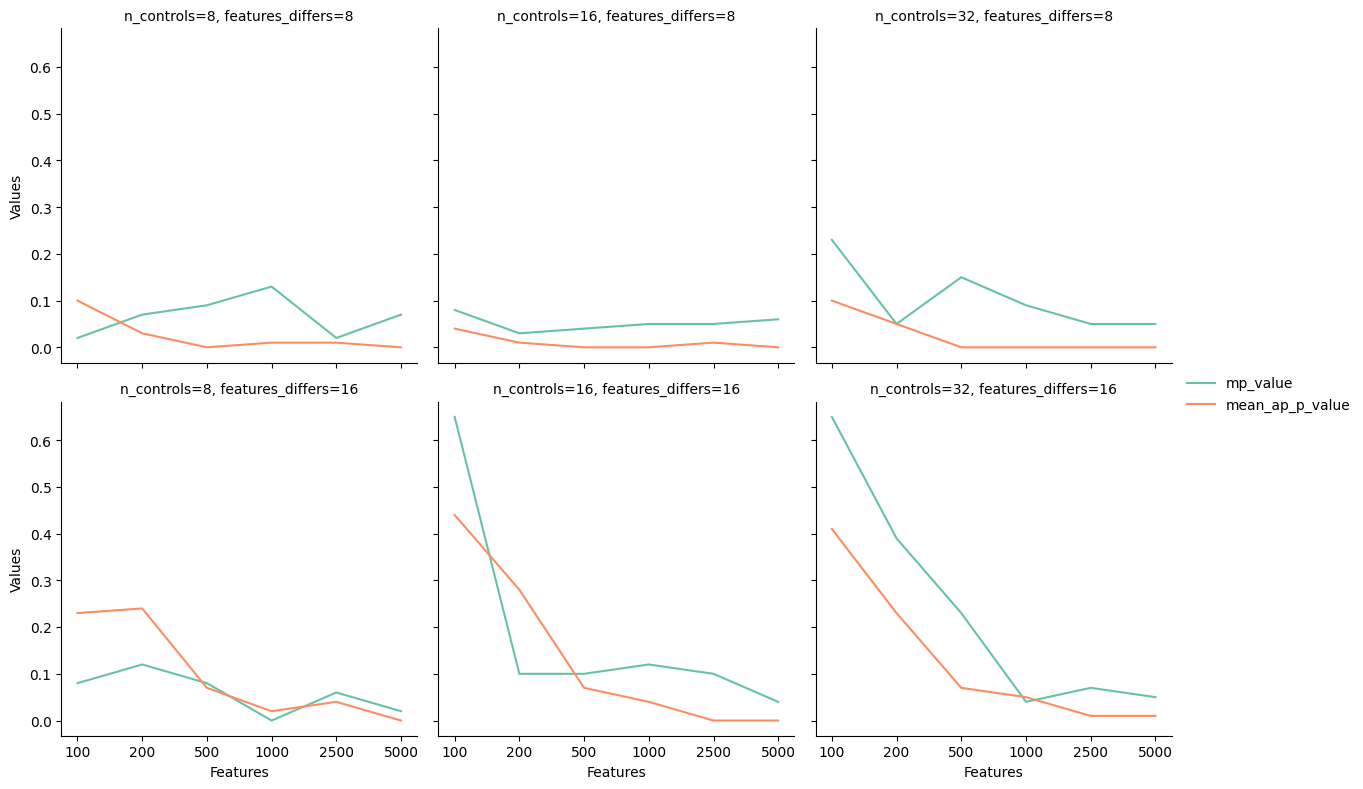

In [6]:
df = feat_results[["mp_value", "map_p_value", "n_feats", "n_controls", "features_differ"]]

df_melted = df.melt(id_vars=["n_feats", 'features_differ', 'n_controls'], 
                    value_vars=['mp_value', 'map_p_value'], 
                    var_name='metric', value_name='value')

# Convert features_differ to string to make it categorical
df_melted['features_differ'] = df_melted['features_differ'].astype(str)
df_melted['n_feats'] = df_melted['n_feats'].astype(str)

# Setting up the FacetGrid
g = sns.FacetGrid(df_melted, col='n_controls', row="features_differ", height=4, aspect=1.0)

# Mapping the lineplot to each subset of the data
g.map_dataframe(sns.lineplot, x='n_feats', y='value', 
                hue='metric', markers=True, 
                dashes=False, markersize=7)

# Adding additional plot details
g.add_legend()
g.set_titles("n_controls={col_name}, features_differs={row_name}")
g.set_axis_labels("Features", "Values")

# Show plot
plt.show()

### feature nums

In [20]:
with open("feat_num_sim_results_proportions.pkl", "rb") as f:
    results = pd.DataFrame(pickle.load(f))

results.rename(columns={"n_plates": "n_replicates", "mean_ap_p_value": "map_p_value"}, inplace=True)
results

,replicate_reproducibility,mp_value,mean_ap,map_p_value,n_feats,n_replicates,n_controls,features_differ,differ_params
0,0.01,0.03,0.14,0.0,100,2,4,1,1
1,0.04,0.06,0.12,0.0,100,2,4,2,1
2,0.02,0.02,0.11,0.0,100,2,4,4,1
3,0.04,0.10,0.13,0.0,100,2,4,8,1
4,0.00,0.02,0.30,0.0,100,2,4,16,1
...,...,...,...,...,...,...,...,...,...
373,0.00,0.52,0.07,1.0,5000,4,16,200,1
374,0.00,0.99,0.97,1.0,5000,4,16,400,1
375,0.00,0.99,1.00,1.0,5000,4,16,800,1
376,0.00,1.00,1.00,1.0,5000,4,16,1600,1


In [18]:
results["n_controls"] = results["n_controls"] * 2

df = results[["mp_value", "mean_ap", "map_p_value", "n_replicates", "n_controls", "features_differ", "n_feats"]]
df['features_differ'] = (100 * df['features_differ'] / df['n_feats']).astype(int).astype(str)
# df['features_differ'] = df['features_differ'].astype(str)
df

/tmp/ipykernel_40369/3166489470.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['features_differ'] = (100 * df['features_differ'] / df['n_feats']).astype(int).astype(str)


,mp_value,mean_ap,map_p_value,n_replicates,n_controls,features_differ,n_feats
0,0.03,0.14,0.0,2,8,1,100
1,0.06,0.12,0.0,2,8,2,100
2,0.02,0.11,0.0,2,8,4,100
3,0.10,0.13,0.0,2,8,8,100
4,0.02,0.30,0.0,2,8,16,100
...,...,...,...,...,...,...,...
373,0.52,0.07,1.0,4,32,4,5000
374,0.99,0.97,1.0,4,32,8,5000
375,0.99,1.00,1.0,4,32,16,5000
376,1.00,1.00,1.0,4,32,32,5000


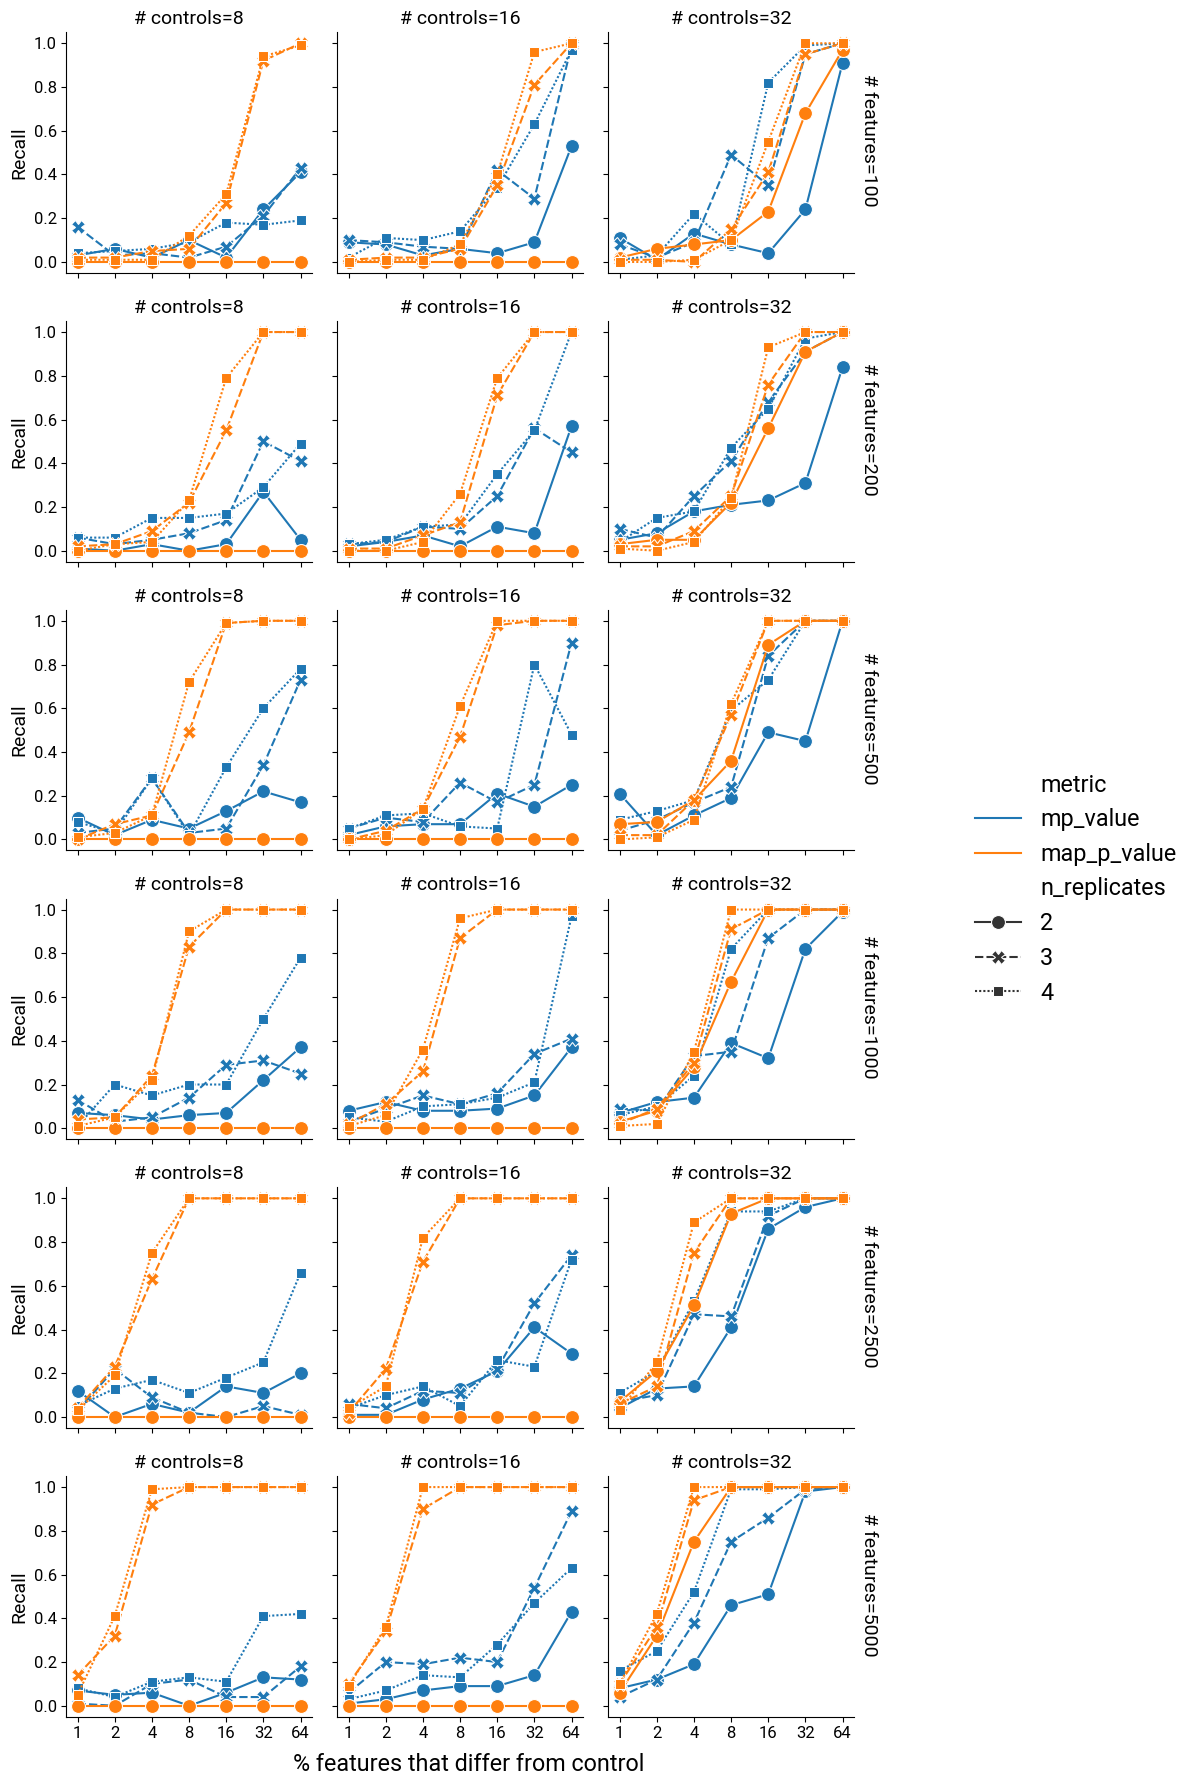

In [19]:
# Increase global font sizes
plt.rcParams.update({'font.size': 14, 'axes.labelsize': 14, 'axes.titlesize': 14})

df_melted = df.melt(id_vars=['features_differ', 'n_replicates', 'n_controls', 'n_feats'], 
                    value_vars=['mp_value', 'map_p_value'], 
                    var_name='metric', value_name='value')

# Adjust the height and aspect for larger subplots
g = sns.FacetGrid(df_melted, row='n_feats', col='n_controls', height=3, aspect=1.0)

plt.subplots_adjust(bottom=0.33)
g.fig.text(0.45, 0.01, '% features that differ from control', ha='center', fontsize='large')

# Mapping the lineplot to each subset of the data
g.map_dataframe(sns.lineplot, x='features_differ', y='value', 
                hue='metric', style="n_replicates", markers=True, 
                dashes=True, markersize=10)

# Adding additional plot details
g.add_legend(bbox_to_anchor=(1.1, 0.5), loc='center right', fontsize='large')
g.set_axis_labels("", "Recall")
g.set_titles("# controls={col_name}", fontsize=14)

# Adjust the tick labels size
for ax in g.axes.flatten():
    ax.tick_params(labelsize=12)

# Add common row titles
for ax, title in zip(g.axes[:, -1], g.row_names):
    ax.text(1.1, 0.55, f'# features={title}', 
            rotation=270, verticalalignment='center', 
            horizontalalignment='right', transform=ax.transAxes,
            fontsize=14)

# Show plot
plt.show()


In [21]:
results["n_controls"] = results["n_controls"] * results["n_replicates"]

df = results[["mp_value", "mean_ap", "map_p_value", "n_replicates", "n_controls", "features_differ", "n_feats"]]
df['features_differ'] = (100 * df['features_differ'] / df['n_feats']).astype(int).astype(str)
# df['features_differ'] = df['features_differ'].astype(str)
df

/tmp/ipykernel_40369/377490062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['features_differ'] = (100 * df['features_differ'] / df['n_feats']).astype(int).astype(str)


,mp_value,mean_ap,map_p_value,n_replicates,n_controls,features_differ,n_feats
0,0.03,0.14,0.0,2,8,1,100
1,0.06,0.12,0.0,2,8,2,100
2,0.02,0.11,0.0,2,8,4,100
3,0.10,0.13,0.0,2,8,8,100
4,0.02,0.30,0.0,2,8,16,100
...,...,...,...,...,...,...,...
373,0.52,0.07,1.0,4,64,4,5000
374,0.99,0.97,1.0,4,64,8,5000
375,0.99,1.00,1.0,4,64,16,5000
376,1.00,1.00,1.0,4,64,32,5000


In [27]:
df.query("n_replicates == 2")["n_controls"].unique()

array([ 8, 16, 32])

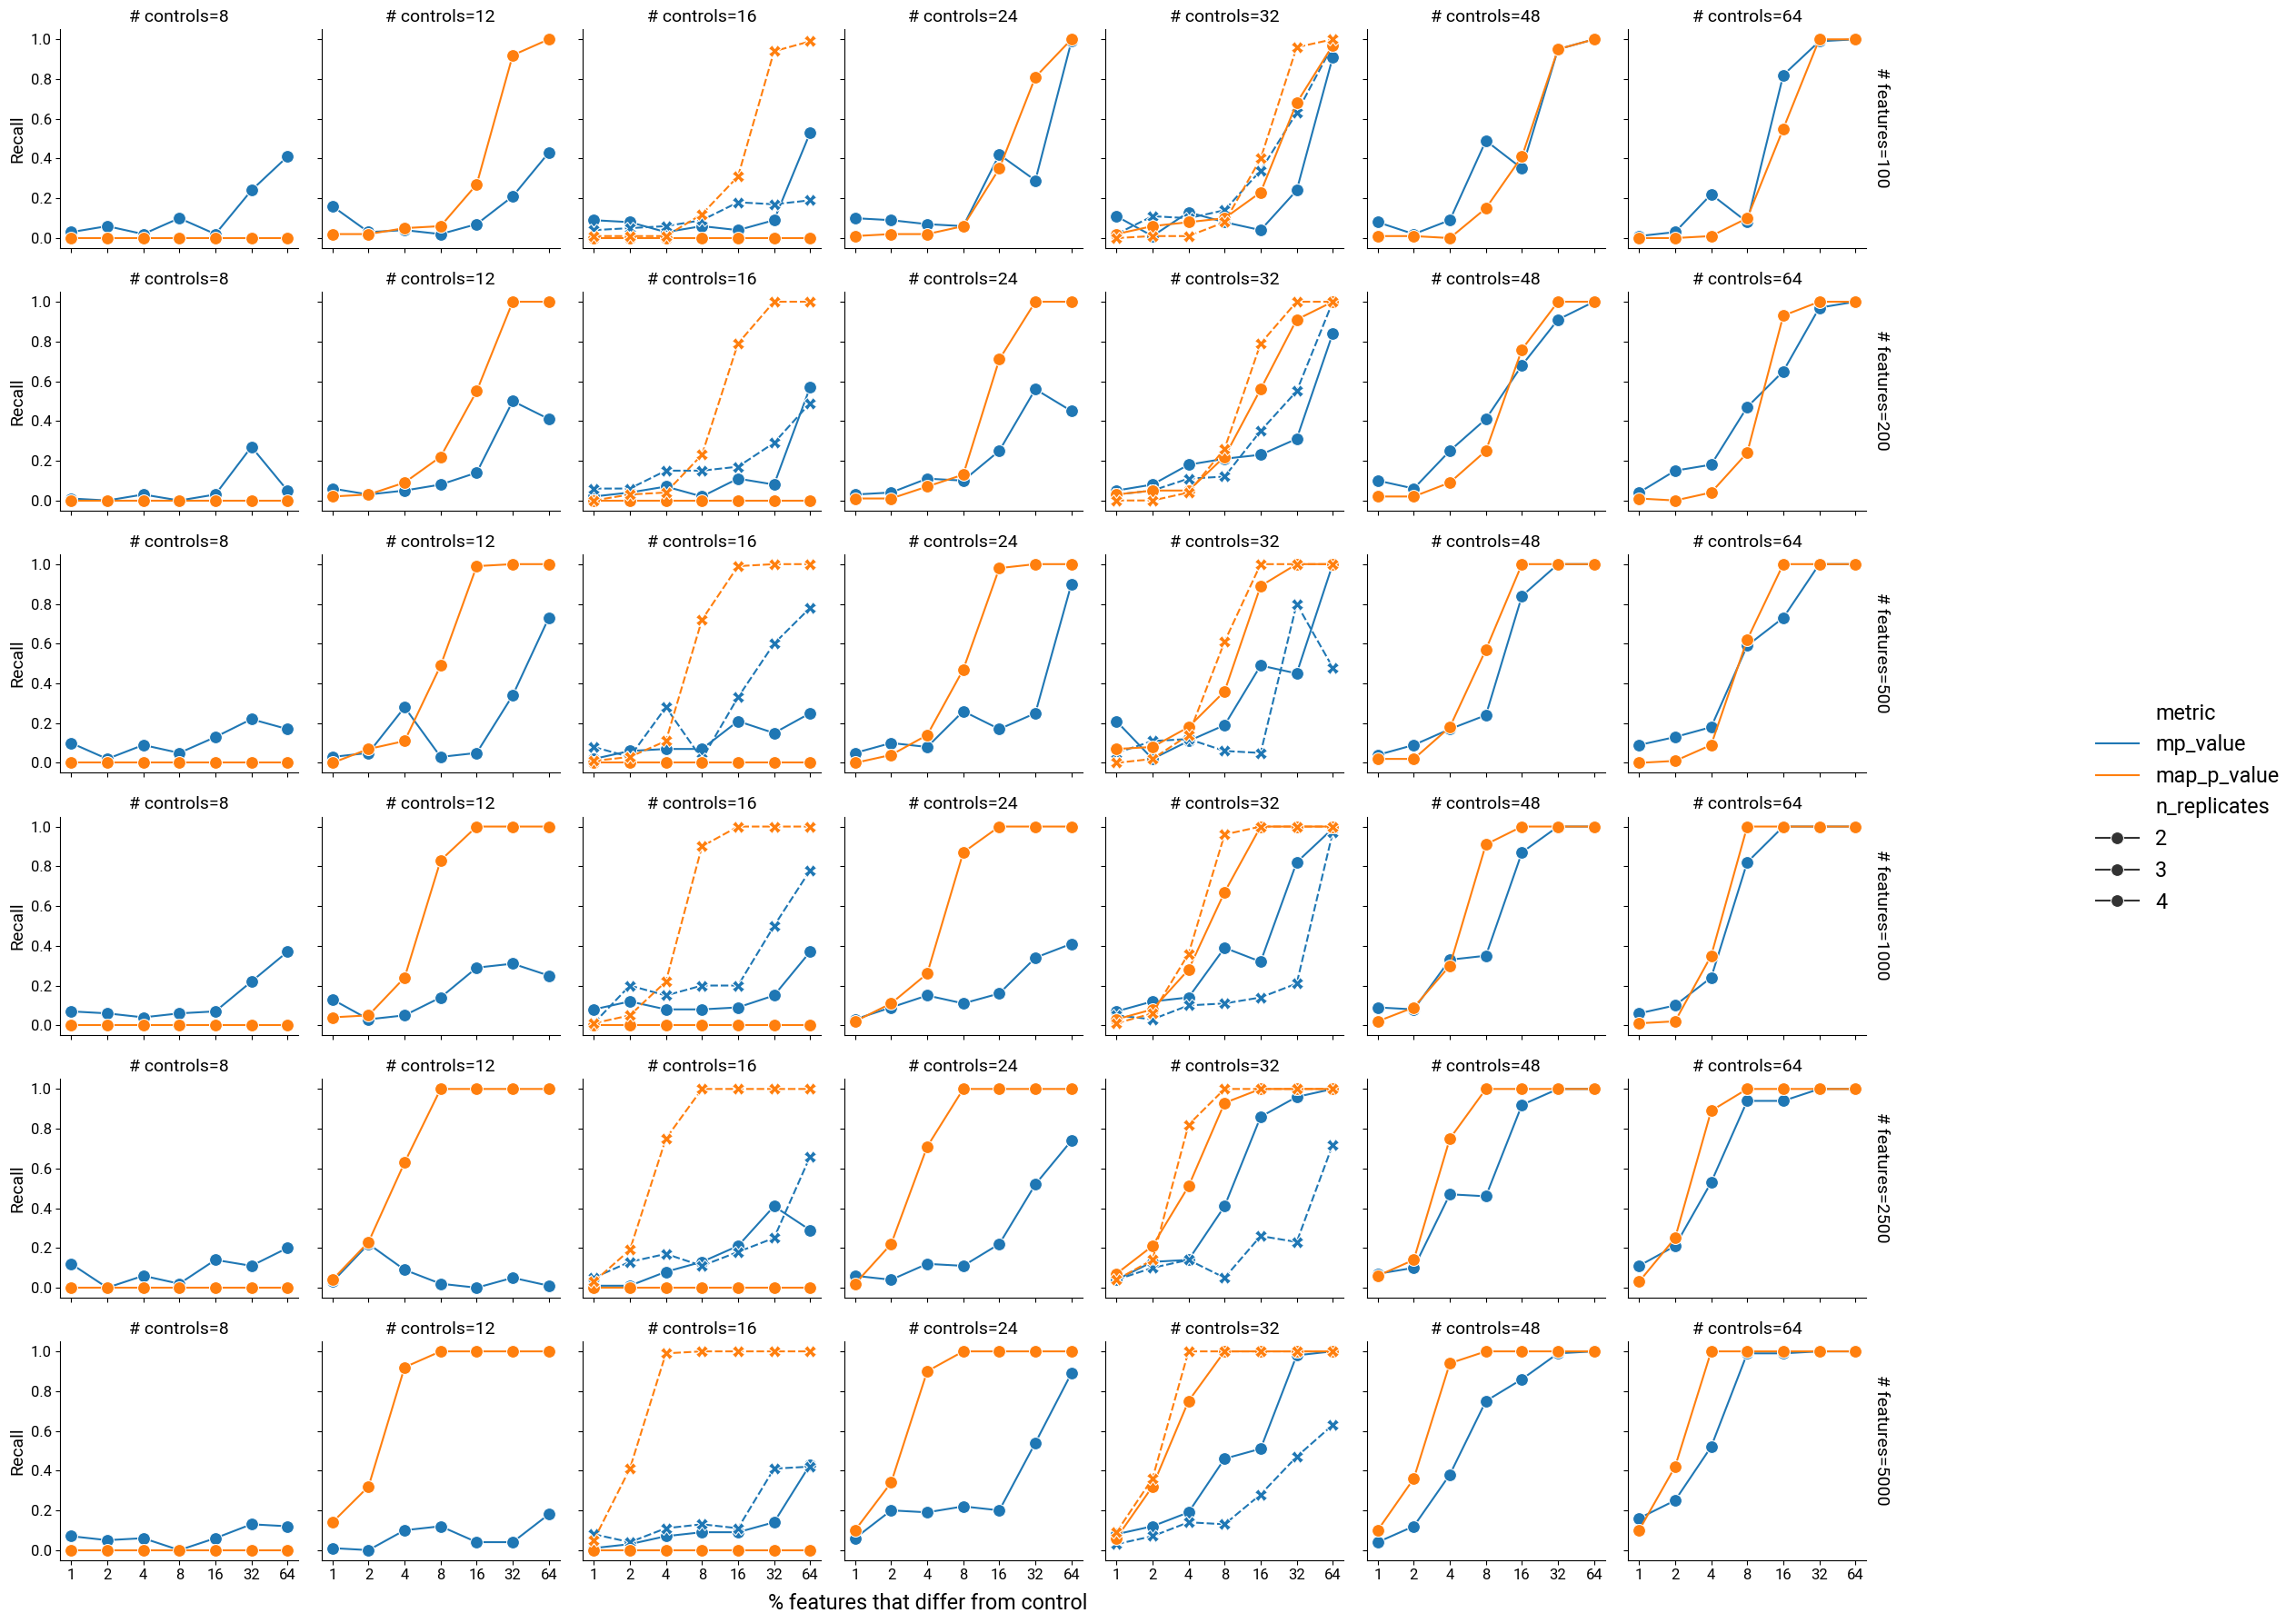

In [22]:
# Increase global font sizes
plt.rcParams.update({'font.size': 14, 'axes.labelsize': 14, 'axes.titlesize': 14})

df_melted = df.melt(id_vars=['features_differ', 'n_replicates', 'n_controls', 'n_feats'], 
                    value_vars=['mp_value', 'map_p_value'], 
                    var_name='metric', value_name='value')

# Adjust the height and aspect for larger subplots
g = sns.FacetGrid(df_melted, row='n_feats', col='n_controls', height=3, aspect=1.0)

plt.subplots_adjust(bottom=0.33)
g.fig.text(0.45, 0.01, '% features that differ from control', ha='center', fontsize='large')

# Mapping the lineplot to each subset of the data
g.map_dataframe(sns.lineplot, x='features_differ', y='value', 
                hue='metric', style="n_replicates", markers=True, 
                dashes=True, markersize=10)

# Adding additional plot details
g.add_legend(bbox_to_anchor=(1.1, 0.5), loc='center right', fontsize='large')
g.set_axis_labels("", "Recall")
g.set_titles("# controls={col_name}", fontsize=14)

# Adjust the tick labels size
for ax in g.axes.flatten():
    ax.tick_params(labelsize=12)

# Add common row titles
for ax, title in zip(g.axes[:, -1], g.row_names):
    ax.text(1.1, 0.55, f'# features={title}', 
            rotation=270, verticalalignment='center', 
            horizontalalignment='right', transform=ax.transAxes,
            fontsize=14)

# Show plot
plt.show()


In [31]:
#### feature types

In [21]:
with open("feat_num_sim_results_nongaussian.pkl", "rb") as f:
    results = pd.DataFrame(pickle.load(f))

results.rename(columns={"n_plates": "n_replicates"}, inplace=True)
results["n_controls"] = results["n_controls"] * 2
results["features_differ_sum"] = results["features_differ"].apply(lambda x: sum([v for v in x.values()]))
results["features_differ_prop"] = results["features_differ_sum"] / results["n_feats"]
results

,replicate_reproducibility,mp_value,mean_ap,mean_ap_p_value,n_feats,n_replicates,n_controls,features_differ,feature_proportions,features_differ_sum,features_differ_prop
0,0.086667,0.97,0.07,0.40,100,3,32,"{'gaussian': 1, 'lognormal': 1, 'poisson': 1, ...","{'gaussian': 0.7, 'lognormal': 0.1, 'poisson':...",4,0.04
1,0.083333,0.95,0.06,0.31,100,3,32,"{'gaussian': 2, 'lognormal': 2, 'poisson': 2, ...","{'gaussian': 0.7, 'lognormal': 0.1, 'poisson':...",8,0.08
2,0.203333,1.00,0.01,0.12,100,3,32,"{'gaussian': 4, 'lognormal': 4, 'poisson': 4, ...","{'gaussian': 0.7, 'lognormal': 0.1, 'poisson':...",16,0.16
3,0.273333,0.98,0.02,0.07,100,3,32,"{'gaussian': 8, 'lognormal': 8, 'poisson': 8, ...","{'gaussian': 0.7, 'lognormal': 0.1, 'poisson':...",32,0.32
4,0.330000,0.99,0.00,0.04,100,3,32,"{'gaussian': 16, 'lognormal': 10, 'poisson': 1...","{'gaussian': 0.7, 'lognormal': 0.1, 'poisson':...",46,0.46
...,...,...,...,...,...,...,...,...,...,...,...
331,0.320000,1.00,0.00,0.02,2500,4,32,"{'gaussian': 100, 'lognormal': 100, 'poisson':...","{'gaussian': 0.4, 'lognormal': 0.4, 'poisson':...",400,0.16
332,0.460000,1.00,0.00,0.02,2500,4,32,"{'gaussian': 200, 'lognormal': 200, 'poisson':...","{'gaussian': 0.4, 'lognormal': 0.4, 'poisson':...",800,0.32
333,0.573333,1.00,0.00,0.00,2500,4,32,"{'gaussian': 400, 'lognormal': 400, 'poisson':...","{'gaussian': 0.4, 'lognormal': 0.4, 'poisson':...",1300,0.52
334,0.698333,1.00,0.00,0.00,2500,4,32,"{'gaussian': 800, 'lognormal': 800, 'poisson':...","{'gaussian': 0.4, 'lognormal': 0.4, 'poisson':...",2100,0.84


<Axes: >

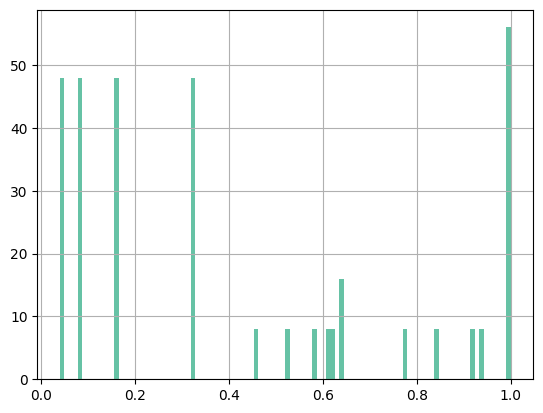

In [22]:
results["features_differ_prop"].hist(bins=100)

In [25]:
df = results[["mp_value", "mean_ap", "mean_ap_p_value", "n_replicates", "n_controls", "features_differ_prop", "n_feats"]]

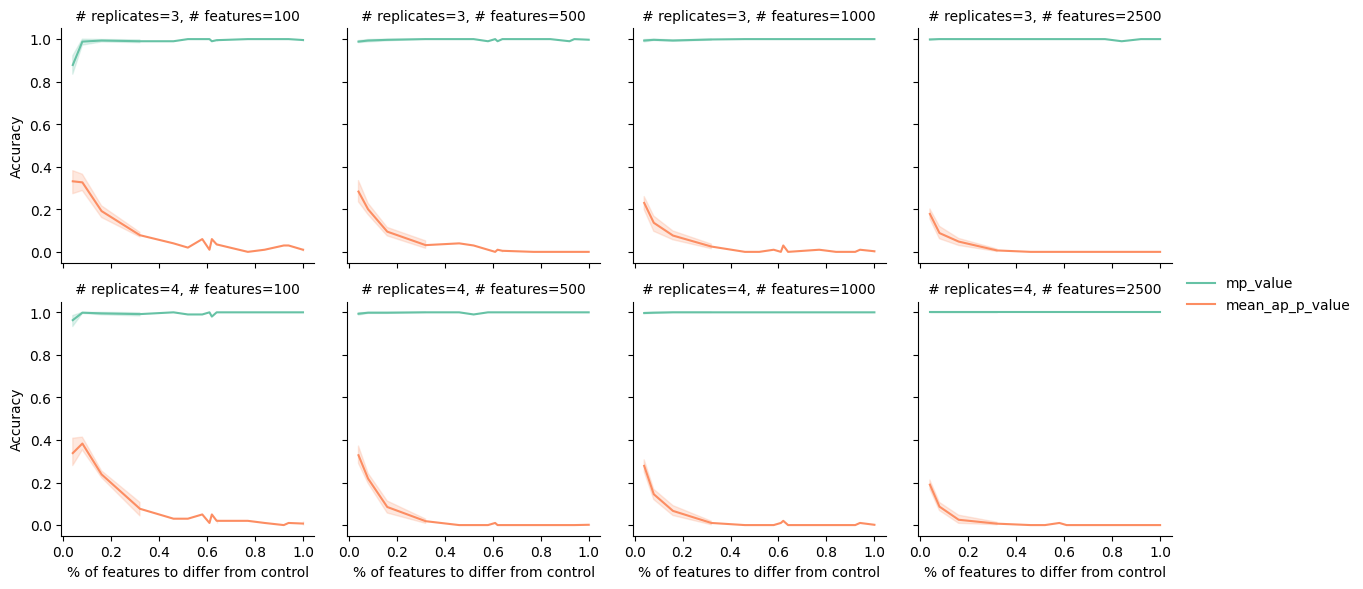

In [27]:
df_melted = df.melt(id_vars=['features_differ_prop', 'n_replicates', 'n_feats'], 
                    # value_vars=['mp_value', 'mean_ap', 'mean_ap_p_value'], 
                    value_vars=['mp_value', 'mean_ap_p_value'], 
                    var_name='metric', value_name='value')


# Setting up the FacetGrid
g = sns.FacetGrid(df_melted, row='n_replicates', col='n_feats', height=3, aspect=1.0)

# Mapping the lineplot to each subset of the data
g.map_dataframe(sns.lineplot, x='features_differ_prop', y='value', 
                hue='metric', markers=True, 
                dashes=False, markersize=10)

# Adding additional plot details
g.add_legend()
g.set_titles("# replicates={row_name}, # features={col_name}")
g.set_axis_labels("% of features to differ from control", "Accuracy")

# Show plot
plt.show()

In [3]:
with open("feat_num_sim_results_euclidean5000.pkl", "rb") as f:
    results = pd.DataFrame(pickle.load(f))

results.rename(columns={"n_plates": "n_replicates", "mean_ap_p_value": "map_p_value"}, inplace=True)
results["n_controls"] = results["n_controls"] * 2
results

,replicate_reproducibility,mp_value,mean_ap,map_p_value,n_feats,n_replicates,n_controls,features_differ,differ_params
0,0.160000,0.07,0.00,0.0,5000,2,8,50,1
1,0.160000,0.07,0.05,0.0,5000,2,8,100,1
2,0.380000,0.08,0.00,0.0,5000,2,8,200,1
3,0.540000,0.10,0.00,0.0,5000,2,8,400,1
4,0.960000,0.03,0.00,0.0,5000,2,8,800,1
...,...,...,...,...,...,...,...,...,...
58,0.275000,0.71,0.00,0.0,5000,4,32,200,1
59,0.595000,0.96,0.00,0.0,5000,4,32,400,1
60,0.986667,1.00,0.00,0.0,5000,4,32,800,1
61,1.000000,1.00,0.00,0.0,5000,4,32,1600,1


In [4]:
df = results[["mp_value", "mean_ap", "map_p_value", "n_replicates", "n_controls", "features_differ", "n_feats"]]
df['features_differ'] = (100 * df['features_differ'] / df['n_feats']).astype(int).astype(str)
# df['features_differ'] = df['features_differ'].astype(str)
df

/tmp/ipykernel_40369/4169809133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['features_differ'] = (100 * df['features_differ'] / df['n_feats']).astype(int).astype(str)


,mp_value,mean_ap,map_p_value,n_replicates,n_controls,features_differ,n_feats
0,0.07,0.00,0.0,2,8,1,5000
1,0.07,0.05,0.0,2,8,2,5000
2,0.08,0.00,0.0,2,8,4,5000
3,0.10,0.00,0.0,2,8,8,5000
4,0.03,0.00,0.0,2,8,16,5000
...,...,...,...,...,...,...,...
58,0.71,0.00,0.0,4,32,4,5000
59,0.96,0.00,0.0,4,32,8,5000
60,1.00,0.00,0.0,4,32,16,5000
61,1.00,0.00,0.0,4,32,32,5000


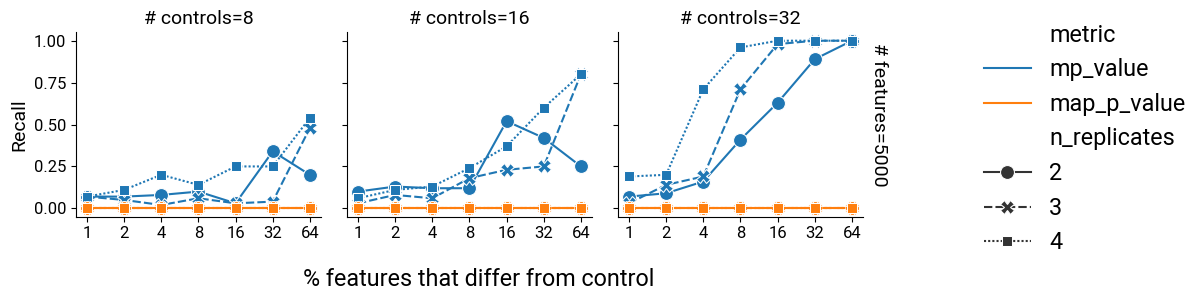

In [5]:
# Increase global font sizes
plt.rcParams.update({'font.size': 14, 'axes.labelsize': 14, 'axes.titlesize': 14})

df_melted = df.melt(id_vars=['features_differ', 'n_replicates', 'n_controls', 'n_feats'], 
                    value_vars=['mp_value', 'map_p_value'], 
                    var_name='metric', value_name='value')

# Adjust the height and aspect for larger subplots
g = sns.FacetGrid(df_melted, row='n_feats', col='n_controls', height=3, aspect=1.0)

plt.subplots_adjust(bottom=0.33)
g.fig.text(0.45, 0.01, '% features that differ from control', ha='center', fontsize='large')

# Mapping the lineplot to each subset of the data
g.map_dataframe(sns.lineplot, x='features_differ', y='value', 
                hue='metric', style="n_replicates", markers=True, 
                dashes=True, markersize=10)

# Adding additional plot details
g.add_legend(bbox_to_anchor=(1.1, 0.5), loc='center right', fontsize='large')
g.set_axis_labels("", "Recall")
g.set_titles("# controls={col_name}", fontsize=14)

# Adjust the tick labels size
for ax in g.axes.flatten():
    ax.tick_params(labelsize=12)

# Add common row titles
for ax, title in zip(g.axes[:, -1], g.row_names):
    ax.text(1.1, 0.55, f'# features={title}', 
            rotation=270, verticalalignment='center', 
            horizontalalignment='right', transform=ax.transAxes,
            fontsize=14)

# Show plot
plt.show()


## Updates with equal # of controls

In [4]:
with open("feat_num_sim_results_euclidean.pkl", "rb") as f:
    results = pd.DataFrame(pickle.load(f))

results.rename(columns={
    "n_plates": "# replicates",
    # "mean_ap_p_value": "mAP p-value (Euclidean)",
    "cosine_mean_ap_p_value": "mAP p-value",
    "mp_value": "mp-value",
    }, inplace=True)
results

,replicate_reproducibility,mp-value,mean_ap,mean_ap_p_value,n_feats,# replicates,n_controls,features_differ,differ_params,cosine_mean_ap,mAP p-value
0,0.050000,0.02,0.00,0.00,100,2,6,1,1,0.03,0.0
1,0.070000,0.04,0.05,0.00,100,2,6,2,1,0.10,0.0
2,0.020000,0.06,0.01,0.00,100,2,6,4,1,0.10,0.0
3,0.040000,0.04,0.01,0.00,100,2,6,8,1,0.09,0.0
4,0.120000,0.07,0.12,0.00,100,2,6,16,1,0.36,0.0
...,...,...,...,...,...,...,...,...,...,...,...
373,0.248333,0.17,0.00,0.59,5000,4,9,200,1,0.10,1.0
374,0.641667,0.16,0.00,1.00,5000,4,9,400,1,1.00,1.0
375,0.988333,0.40,0.89,1.00,5000,4,9,800,1,1.00,1.0
376,1.000000,0.47,1.00,1.00,5000,4,9,1600,1,1.00,1.0


In [5]:
results["n_controls"] = results["n_controls"] * results["# replicates"]

df = results[["mp-value", "mAP p-value", "# replicates", "n_controls", "features_differ", "n_feats"]]
df['features_differ'] = (100 * df['features_differ'] / df['n_feats']).astype(int).astype(str)
# df['features_differ'] = df['features_differ'].astype(str)
df

/tmp/ipykernel_20080/771675615.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['features_differ'] = (100 * df['features_differ'] / df['n_feats']).astype(int).astype(str)


,mp-value,mAP p-value,# replicates,n_controls,features_differ,n_feats
0,0.02,0.0,2,12,1,100
1,0.04,0.0,2,12,2,100
2,0.06,0.0,2,12,4,100
3,0.04,0.0,2,12,8,100
4,0.07,0.0,2,12,16,100
...,...,...,...,...,...,...
373,0.17,1.0,4,36,4,5000
374,0.16,1.0,4,36,8,5000
375,0.40,1.0,4,36,16,5000
376,0.47,1.0,4,36,32,5000


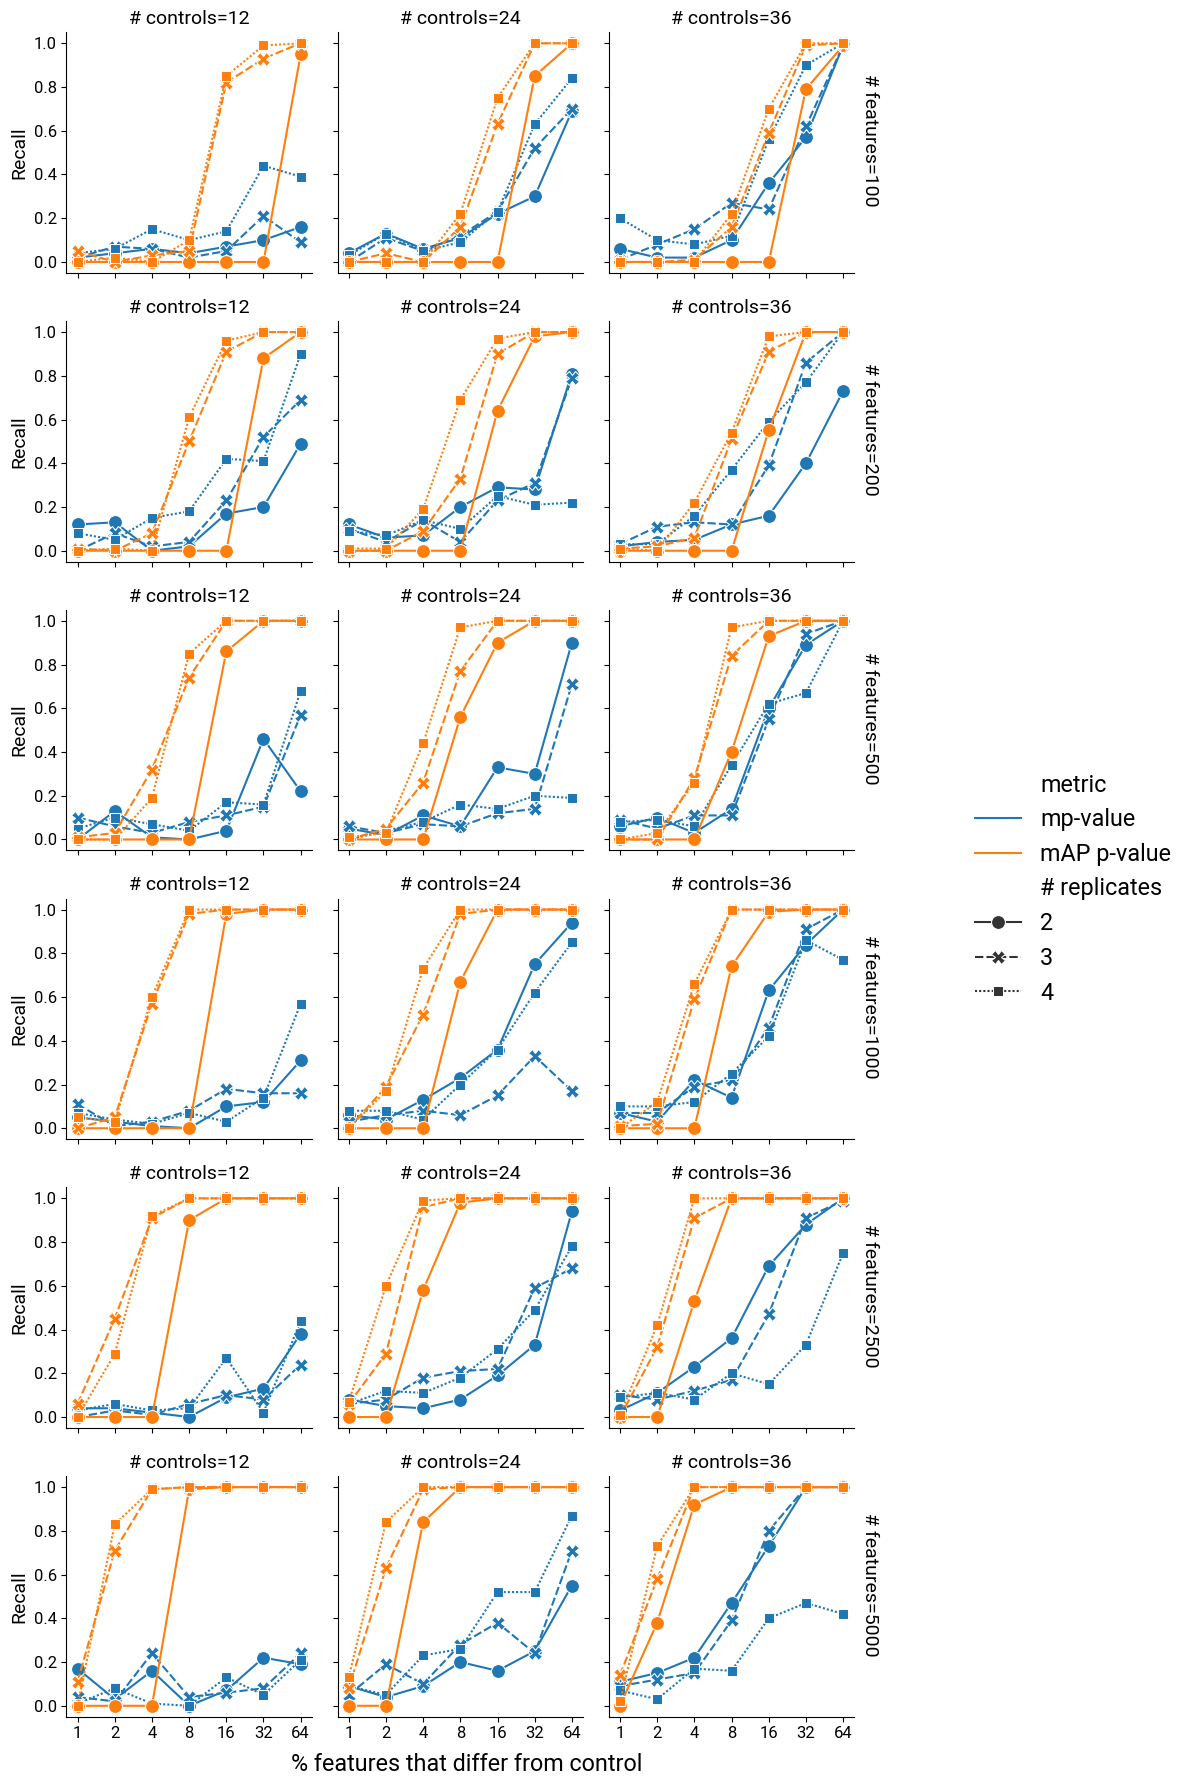

In [9]:
# Increase global font sizes
plt.rcParams.update({'font.size': 14, 'axes.labelsize': 14, 'axes.titlesize': 14})

df_melted = df.melt(id_vars=['features_differ', '# replicates', 'n_controls', 'n_feats'], 
                    value_vars=['mp-value', 'mAP p-value'], 
                    var_name='metric', value_name='value')

# Adjust the height and aspect for larger subplots
g = sns.FacetGrid(df_melted, row='n_feats', col='n_controls', height=3, aspect=1.0)

plt.subplots_adjust(bottom=0.33)
g.fig.text(0.45, 0.01, '% features that differ from control', ha='center', fontsize='large')

# Mapping the lineplot to each subset of the data
g.map_dataframe(sns.lineplot, x='features_differ', y='value', 
                hue='metric', style="# replicates", markers=True, 
                dashes=True, markersize=10)

# Adding additional plot details
g.add_legend(bbox_to_anchor=(1.1, 0.5), loc='center right', fontsize='large')
g.set_axis_labels("", "Recall")
g.set_titles("# controls={col_name}", fontsize=14)

# Adjust the tick labels size
for ax in g.axes.flatten():
    ax.tick_params(labelsize=12)

# Add common row titles
for ax, title in zip(g.axes[:, -1], g.row_names):
    ax.text(1.1, 0.55, f'# features={title}', 
            rotation=270, verticalalignment='center', 
            horizontalalignment='right', transform=ax.transAxes,
            fontsize=14)

# Show plot
plt.show()
